## Name : Tejas Sinroja
## Task 4 : Email Mail Spam Detection with Machine Learning.

### 1. Importing the necessary dependencies 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as plio
plio.templates
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import re
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_recall_curve, average_precision_score
from warnings import filterwarnings
filterwarnings(action='ignore')

### 2. Exploring the dataset

In [5]:
data = pd.read_csv('SMS spam dataset.zip', encoding='ISO-8859-1')

In [6]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Dropping unnecessary columns from the dataset

In [8]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3','Unnamed: 4']
data.drop(columns=columns_to_drop, inplace=True)

In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### Renaming columns v1 -> class and v2 -> text

In [10]:
col_rename = {'v1': 'class', 'v2': 'text'}
data = data.rename(columns=col_rename)

In [11]:
data
#data.to_csv('spam_cleaned.csv')

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
class_key = data['class'].value_counts().keys()
class_count = data['class'].value_counts().values
labels = [str(val) for val in class_count]

fig = px.bar(x=class_key, y=class_count, text=labels, title='Class vs count', template='plotly', color_discrete_sequence=['darkviolet'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='class_count')
fig.update_xaxes(title_text='class_key')

# Show the plot
fig.show()

In [13]:
# Count the occurrences of top 15 unique strings in the 'text' column
value_counts = data['text'].value_counts().head(15).reset_index()
value_counts.columns = ['Category', 'Count']

# Create a bar plot using Plotly
fig = px.bar(value_counts, x='Category', y='Count')

# Add values to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Set plot labels and title
fig.update_xaxes(title='text')
fig.update_yaxes(title='Occurences of the text')
fig.update_layout(title='Most Common String in the Text Column')

# Show the plot
fig.show()

#### Encoding the class column 

In [14]:
# Changing Class column : ham -> 0, spam -> 1
category_mapping = {'ham': 0, 'spam': 1}
data['class'] = data['class'].map(category_mapping)

In [15]:
data

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


###  3. Data Modelling (Preparing the training and testing data)

In [16]:
x_train, x_test, y_train, y_test=train_test_split(data.text, data['class'],test_size=0.3)

### 4. Countervectorizing x_train and x_test

#### CountVectorizer is commonly used in text classification tasks, where it helps convert text strings into a format suitable for training classifiers.

In [17]:
cv = CountVectorizer()

In [18]:
x_train_new = cv.fit_transform(x_train)

In [19]:
x_test_new = cv.transform(x_test)

In [20]:
x_train_array = x_train_new.toarray()
x_test_array = x_test_new.toarray()

### 5. Training and testing using Classification Models


### [A] Multinomial Naive Bayes Classifier

In [21]:
classifier_1 = MultinomialNB()
classifier_1.fit(x_train_new, y_train)

MultinomialNB()

In [22]:
y_pred_1 = classifier_1.predict(x_test_new)

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1443    3]
 [  17  209]]


In [24]:
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("Accuracy:", accuracy_1)

Accuracy: 0.9880382775119617


In [25]:
class_report = classification_report(y_test, y_pred_1)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1446
           1       0.99      0.92      0.95       226

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



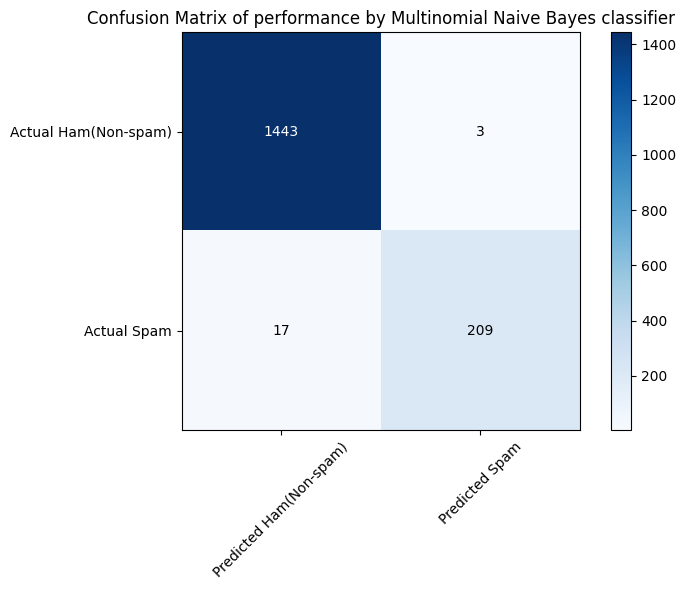

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Multinomial Naive Bayes classifier')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=45)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")
plt.show()

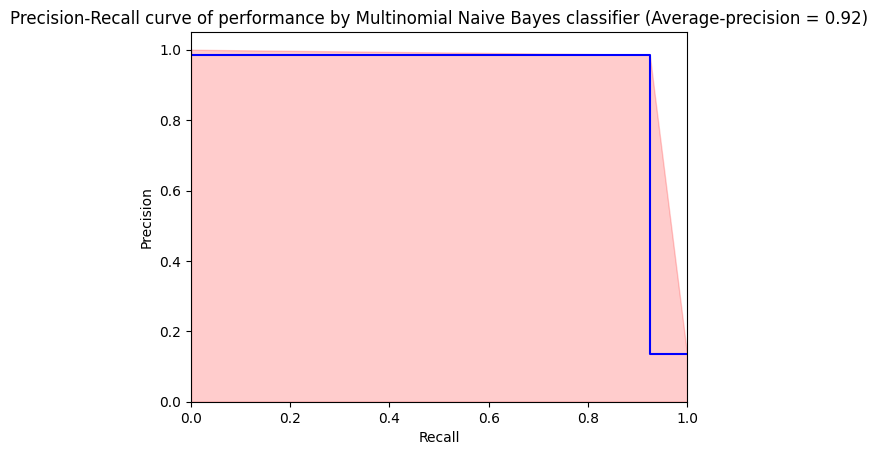

In [27]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_1)
average_precision = average_precision_score(y_test, y_pred_1)
plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve of performance by Multinomial Naive Bayes classifier (Average-precision = {average_precision:.2f})')
plt.show()

### [B] Logistic Regression Classifier

In [28]:
classifier_2 = LogisticRegression()
classifier_2.fit(x_train_new, y_train)

LogisticRegression()

In [29]:
y_pred_2 = classifier_2.predict(x_test_new)

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1445    1]
 [  24  202]]


In [31]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy:", accuracy_2)

Accuracy: 0.9850478468899522


In [32]:
class_report = classification_report(y_test, y_pred_2)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1446
           1       1.00      0.89      0.94       226

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.98      1672



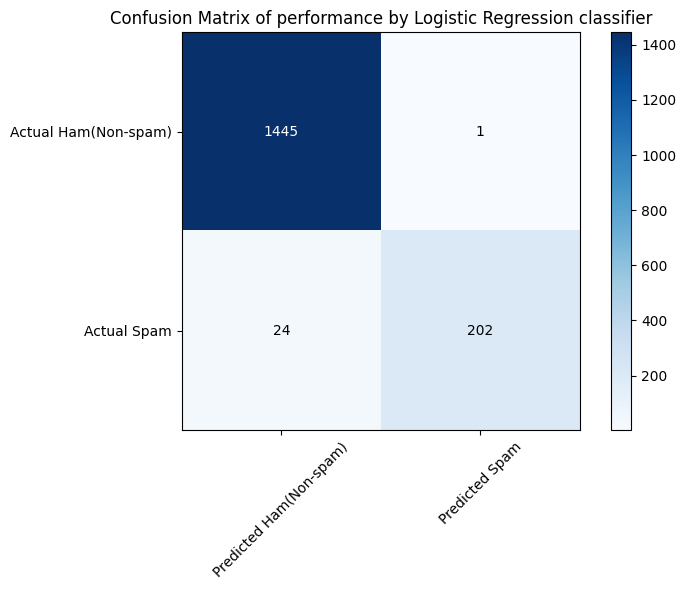

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Logistic Regression classifier')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=45)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")
plt.show()

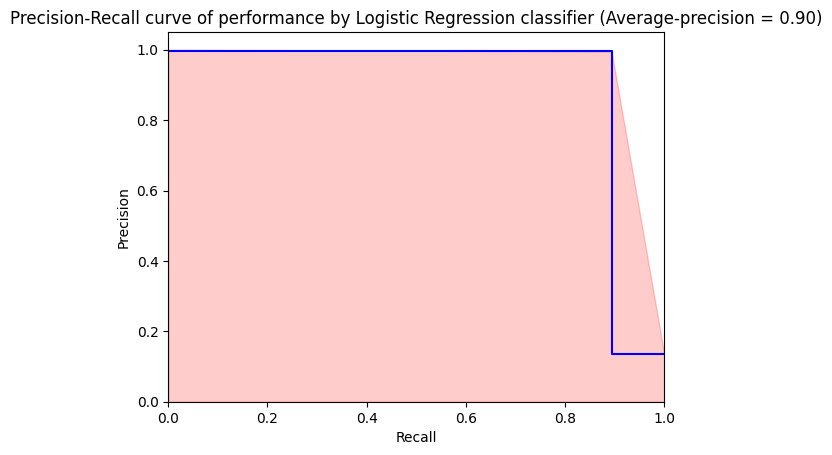

In [34]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_2)
average_precision = average_precision_score(y_test, y_pred_2)
plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve of performance by Logistic Regression classifier (Average-precision = {average_precision:.2f})')
plt.show()

### [C] Decision Tree Classifer

In [35]:
classifier_3 = DecisionTreeClassifier()
classifier_3.fit(x_train_new, y_train)

DecisionTreeClassifier()

In [36]:
y_pred_3 = classifier_3.predict(x_test_new)

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_3)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1428   18]
 [  27  199]]


In [38]:
accuracy_3 = accuracy_score(y_test, y_pred_3)
print("Accuracy:", accuracy_3)

Accuracy: 0.9730861244019139


In [39]:
class_report = classification_report(y_test, y_pred_3)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1446
           1       0.92      0.88      0.90       226

    accuracy                           0.97      1672
   macro avg       0.95      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



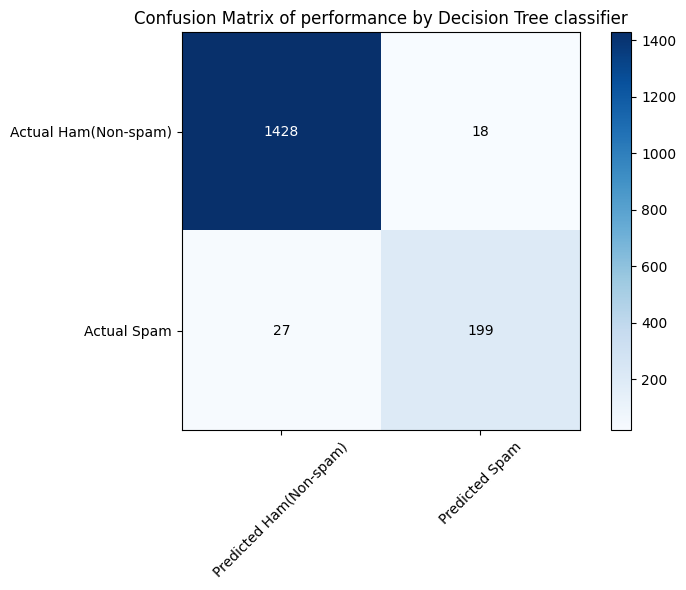

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Decision Tree classifier')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=45)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")
plt.show()

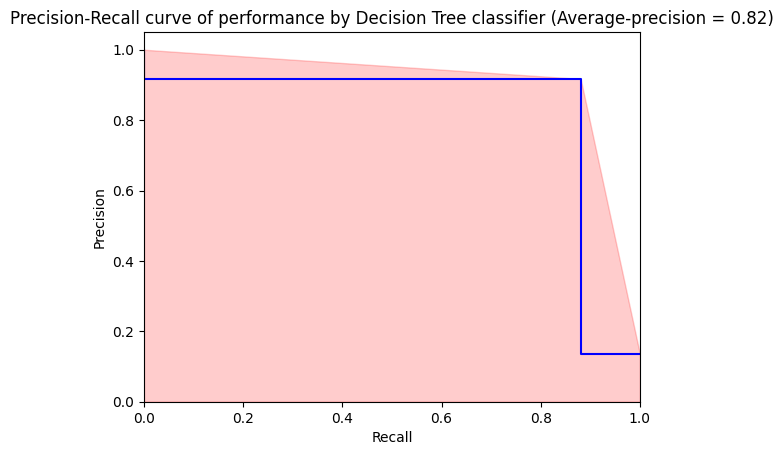

In [41]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_3)
average_precision = average_precision_score(y_test, y_pred_3)
plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve of performance by Decision Tree classifier (Average-precision = {average_precision:.2f})')
plt.show()

### [D] Random Forest Classifier

In [42]:
classifier_4 = RandomForestClassifier()
classifier_4.fit(x_train_new, y_train)

RandomForestClassifier()

In [43]:
y_pred_4 = classifier_4.predict(x_test_new)

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred_4)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1446    0]
 [  27  199]]


In [45]:
accuracy_4 = accuracy_score(y_test, y_pred_4)
print("Accuracy:", accuracy_4)

Accuracy: 0.9838516746411483


In [46]:
class_report = classification_report(y_test, y_pred_4)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1446
           1       1.00      0.88      0.94       226

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



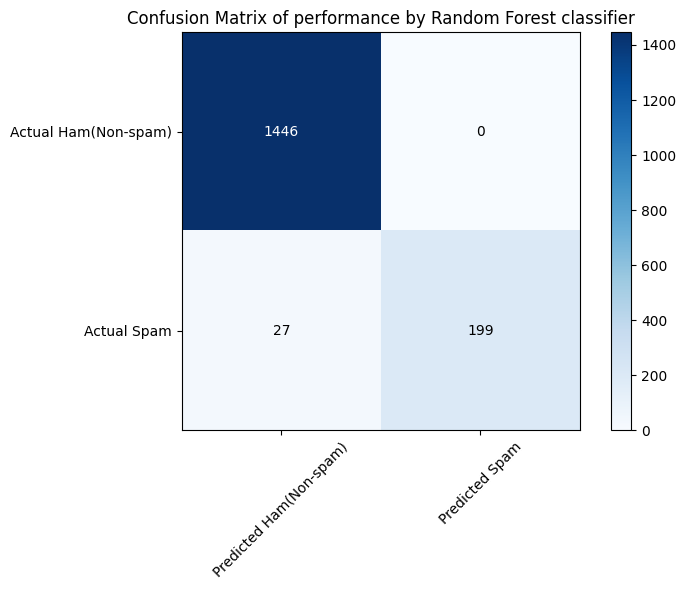

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred_4)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Random Forest classifier')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=45)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")
plt.show()

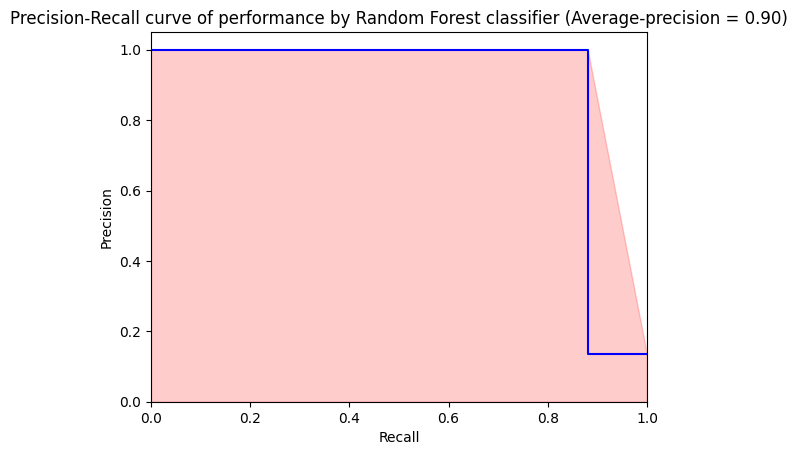

In [48]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_4)
average_precision = average_precision_score(y_test, y_pred_4)
plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve of performance by Random Forest classifier (Average-precision = {average_precision:.2f})')
plt.show()

### [E] Support Vector Machine Classifier

In [49]:
svm = SVC()
classifier_5 = svm
classifier_5.fit(x_train_new, y_train)

SVC()

In [50]:
y_pred_5 = classifier_5.predict(x_test_new)

In [51]:
accuracy_5 = accuracy_score(y_test, y_pred_5)
print("Accuracy:", accuracy_5)

Accuracy: 0.9850478468899522


In [52]:
conf_matrix = confusion_matrix(y_test, y_pred_5)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1446    0]
 [  25  201]]


In [53]:
class_report = classification_report(y_test, y_pred_5)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1446
           1       1.00      0.89      0.94       226

    accuracy                           0.99      1672
   macro avg       0.99      0.94      0.97      1672
weighted avg       0.99      0.99      0.98      1672



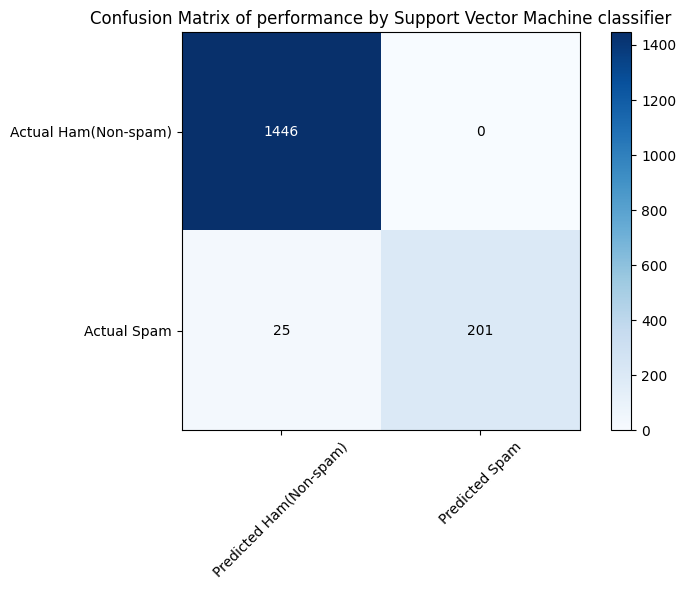

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred_5)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix of performance by Support Vector Machine classifier')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification (e.g., 0 for non-spam and 1 for spam)
plt.xticks(tick_marks, ['Predicted Ham(Non-spam)', 'Predicted Spam'], rotation=45)
plt.yticks(tick_marks, ['Actual Ham(Non-spam)', 'Actual Spam'])
plt.tight_layout()
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")
plt.show()

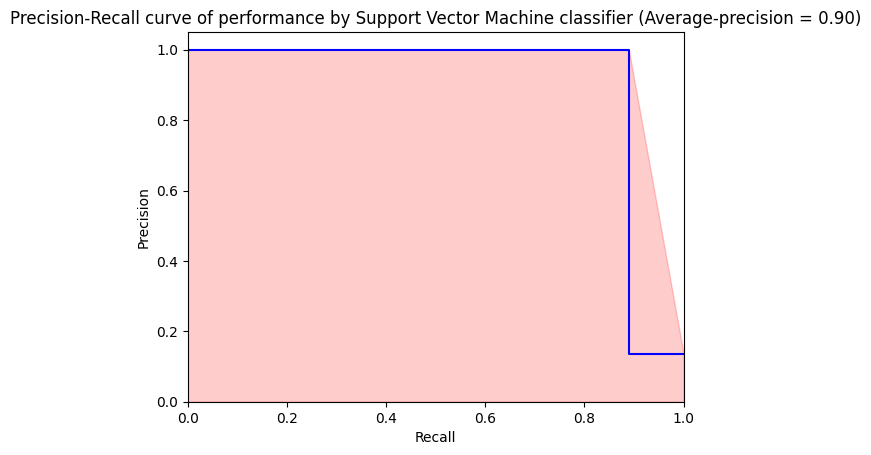

In [55]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_5)
average_precision = average_precision_score(y_test, y_pred_5)
plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve of performance by Support Vector Machine classifier (Average-precision = {average_precision:.2f})')
plt.show()

#### Individual Accuracy scores of each model

In [56]:
model_accuracies = {
    "MultiNominal Naive Bayes Classifier": accuracy_1,
    "Logistic Regression Classifer": accuracy_2,
    "Decision Tree Classifier": accuracy_3,
    "Random Forest Classfier": accuracy_4,
    "Support Vector Machine Classifier": accuracy_5
}

In [57]:
print("1. MultiNominal Naive Bayes Classifier : ", accuracy_1)
print("2. Logistic Regression Classifer : ", accuracy_2)
print("3. Decision Tree Classifier : ", accuracy_3)
print("4. Random Forest Classfier : ", accuracy_4)
print("5. Support Vector Machine Classifier : ", accuracy_5)

1. MultiNominal Naive Bayes Classifier :  0.9880382775119617
2. Logistic Regression Classifer :  0.9850478468899522
3. Decision Tree Classifier :  0.9730861244019139
4. Random Forest Classfier :  0.9838516746411483
5. Support Vector Machine Classifier :  0.9850478468899522


In [58]:
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print(f"Best Performance Model is {best_model_name} with an accuracy score of {best_accuracy}")

Best Performance Model is MultiNominal Naive Bayes Classifier with an accuracy score of 0.9880382775119617
